# 图像增强
- resize
- clip
- flip
- blightness & contrast
- 小心
    - imshow 要求int类型 而在tf增强方法之后数字变成了float类型
    - tf很多函数输入维度要求第一维为batchsize
 -random 方法通常需要三维
     - 使用split在axis=0维度拆分
     - reshape从\[1,,,\]->\[,,\] 
     - 调用函数
     - reshape回来
     - concat axis=0
     
  - 通常图像增强选取几种方法连续使用   

## resize
- resize_area
- resize_bicubic
- resize_nearest_neightbor
- 放大有损失不同策略 缩小不会损失 区别不大

## clip
- pad_to_bounding_box
- crop_to_bounding_box
- random_crop


## flip
- flip_up_down
- flip_random_up_down
- flip_left_right
- flip_random_left_right


## brightness & contrast
- adjust_brightness
- random_brightness
- adjust_contrast
- random_contrast
- 光照 对比度常用增强方法

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

(1, 474, 600, 3)
(1, 474, 600, 3)


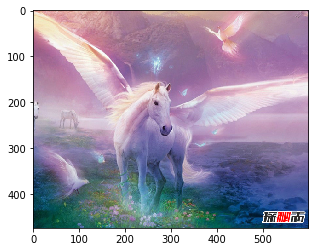

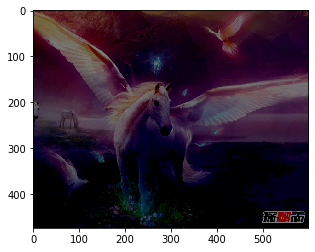

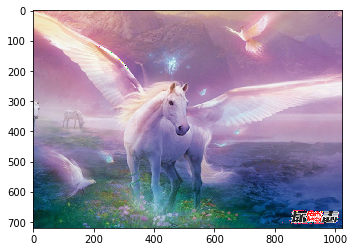

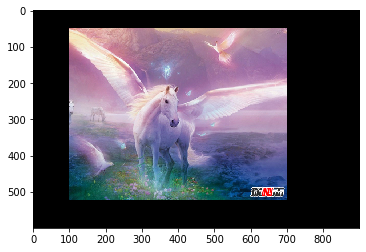

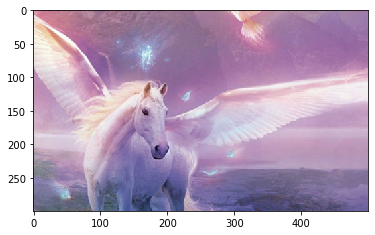

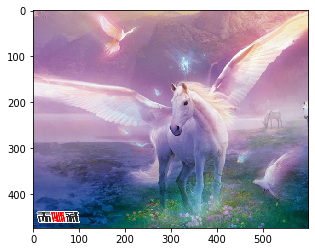

In [17]:
photo_name = './15-1PHP94606.png'
img_str = tf.read_file(photo_name)
img_decoded = tf.image.decode_image(img_str)
# tf默认需要第一维度batchsize
'''
坑
tf定义中as_list不能用爱未知维度上 只有声明维度才能使用
img_decoded = tf.reshape(img_decoded,[1]+img_decoded.get_shape().as_list())
dim 在run之后才知道 所以在使用tf的很多函数维度信息需要预先知道 否则无法使用get_shape
'''
img_decoded = tf.reshape(img_decoded,[1,474,600,3])
print(img_decoded.get_shape())

new_img = tf.image.adjust_brightness(img_decoded,-0.5)
resize_img = tf.image.resize_bicubic(img_decoded,[720,1024])
pad_img = tf.image.pad_to_bounding_box(img_decoded,50,100,600,900)
crop_img = tf.image.crop_to_bounding_box(img_decoded,50,100,300,500)
flip_img = tf.image.flip_left_right(img_decoded)

with tf.Session() as sess:
    img_decoded_val = sess.run(img_decoded)
    #imshow 只能显示nparray 并且要求int类型
    img_decoded_val = img_decoded_val.reshape([474,600,3])
    plt.figure()
    imshow(np.asarray(img_decoded_val,np.uint8))
#     print(np.asarray(img_decoded_val,np.uint8).shape)
#     (474, 600, 3)
    plt.figure()
    new_img_val = sess.run(new_img)
    new_img_val = new_img_val.reshape([474,600,3])
    imshow(np.asarray(new_img_val,np.uint8))
    
    plt.figure()
    resize_img_val = sess.run(resize_img)
    resize_img_val = resize_img_val.reshape([720,1024,3])
    imshow(np.asarray(resize_img_val,np.uint8))
    
    plt.figure()
    pad_img_val = sess.run(pad_img)
    pad_img_val = pad_img_val.reshape([600,900,3])
    imshow(np.asarray(pad_img_val,np.uint8))
    
    plt.figure()
    crop_img_val = sess.run(crop_img)
    crop_img_val = crop_img_val.reshape([300,500,3])
    imshow(np.asarray(crop_img_val,np.uint8))
    
    plt.figure()
    flip_img_val = sess.run(flip_img)
    flip_img_val = flip_img_val.reshape([474,600,3])
    imshow(np.asarray(flip_img_val,np.uint8))
